## Rozwiązanie zadania regresyjnego

Rzowiązanie zadanie zaczynamy od wczytania niezbędnych bibliotek

In [1]:
import pandas as pd #oblusga ramek danych
import matplotlib.pyplot as plt #Wykresy
import seaborn as sns #Wykresy
import statsmodels.api as sm #pakiet do modelowania
from sklearn.model_selection import train_test_split #podział zbioru
from sklearn.metrics import mean_squared_error #obliczanie MSE

Następnie wczytujemy dane z pliku .csv za pomocą bilbioteki `pandas` i sprawdzamy jak wyglądają nasze dane

In [2]:
df = pd.read_csv("life_expectancy.csv", index_col = 0)
df.head()

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
4,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
5,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.describe().round(2)

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
count,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


Należy też sprawdzić czy w naszych danych występują wybrakowane wartości, możemy to zrobić w następujący sposób

In [4]:
df.isna().any() #czy w danej kolumnie występuje chociaż raz NA

Life.expectancy                     True
Adult.Mortality                     True
infant.deaths                      False
Alcohol                             True
percentage.expenditure             False
Hepatitis.B                         True
Measles                            False
BMI                                 True
under.five.deaths                  False
Polio                               True
Total.expenditure                   True
Diphtheria                          True
HIV.AIDS                           False
GDP                                 True
Population                          True
thinness..1.19.years                True
thinness.5.9.years                  True
Income.composition.of.resources     True
Schooling                           True
dtype: bool

In [5]:
df.isna().sum() #ile wartości NA jest w danej kolumnie

Life.expectancy                     10
Adult.Mortality                     10
infant.deaths                        0
Alcohol                            194
percentage.expenditure               0
Hepatitis.B                        553
Measles                              0
BMI                                 34
under.five.deaths                    0
Polio                               19
Total.expenditure                  226
Diphtheria                          19
HIV.AIDS                             0
GDP                                448
Population                         652
thinness..1.19.years                34
thinness.5.9.years                  34
Income.composition.of.resources    167
Schooling                          163
dtype: int64

Możemy też sprawdzić to poprzez metodę `info()` patrząc ile jest wartości `Non-Null`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 1 to 2938
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life.expectancy                  2928 non-null   float64
 1   Adult.Mortality                  2928 non-null   float64
 2   infant.deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage.expenditure           2938 non-null   float64
 5   Hepatitis.B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2904 non-null   float64
 8   under.five.deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total.expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12  HIV.AIDS            

W tym przypadku po prostu usuniemy wiersze z wybrakowanymi wartościami co jest jednym ze sposóbów radzenia sobie z tego typu problemem (oóglnie raczej niezalecany, są lepsze metody)

In [7]:
df = df.dropna() #usuwanie braków danych

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 1 to 2938
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life.expectancy                  1649 non-null   float64
 1   Adult.Mortality                  1649 non-null   float64
 2   infant.deaths                    1649 non-null   int64  
 3   Alcohol                          1649 non-null   float64
 4   percentage.expenditure           1649 non-null   float64
 5   Hepatitis.B                      1649 non-null   float64
 6   Measles                          1649 non-null   int64  
 7   BMI                              1649 non-null   float64
 8   under.five.deaths                1649 non-null   int64  
 9   Polio                            1649 non-null   float64
 10  Total.expenditure                1649 non-null   float64
 11  Diphtheria                       1649 non-null   float64
 12  HIV.AIDS            

Liczba wierwszy w ramce spadła do 1649.

### Modelowanie

Przed procesem tworzenia modelu musimy najpierw podzielić nasz zbiór i odpowiednio go przygotować do procesu uczenia

In [9]:
target = 'Life.expectancy' #określamy co jest naszym targetem
predictors = [col for col in df.columns.to_list() if col != target] #tworzymy listę z nazwami kolumn będącymi predyktorami

In [10]:
print(predictors)

['Adult.Mortality', 'infant.deaths', 'Alcohol', 'percentage.expenditure', 'Hepatitis.B', 'Measles', 'BMI', 'under.five.deaths', 'Polio', 'Total.expenditure', 'Diphtheria', 'HIV.AIDS', 'GDP', 'Population', 'thinness..1.19.years', 'thinness.5.9.years', 'Income.composition.of.resources', 'Schooling']


In [11]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=7) #Dzielimy zbiór danych funkcją która zwracam nam dwie ramki danych

In [12]:
df_train.head()

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
21,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.17868,295195.0,1.4,1.5,0.738,13.3
2134,78.0,179.0,4,9.78,180.109513,98.0,10,51.9,5,99.0,4.36,99.0,0.1,1839.72945,2213197.0,3.8,4.2,0.708,11.7
134,84.0,75.0,0,12.10,7423.228774,86.0,52,55.2,0,86.0,11.17,86.0,0.1,46657.62900,836344.0,1.7,1.9,0.872,15.4
1647,78.5,71.0,0,6.70,1678.392773,89.0,4,63.9,0,94.0,8.60,94.0,0.1,13689.98999,398582.0,0.7,0.7,0.790,13.8
900,69.7,19.0,0,0.01,50.539484,99.0,0,61.9,0,99.0,4.49,99.0,0.1,546.37280,88586.0,4.0,3.7,0.727,15.2


In [13]:
df_test.head()

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1447,73.6,169.0,0,10.14,24.708410,89.0,1,59.4,0,92.0,6.10,92.0,0.1,1372.689470,25979.0,2.2,2.3,0.810,15.8
2227,64.7,22.0,0,5.46,47.089311,75.0,0,24.0,0,97.0,7.84,97.0,1.2,843.894470,159328.0,6.9,6.8,0.521,10.2
2742,67.4,267.0,5,6.79,180.353786,98.0,146,56.1,6,99.0,6.61,99.0,1.0,1367.352433,474516.0,2.7,2.8,0.700,14.6
1112,65.9,221.0,0,7.52,48.028594,95.0,0,42.4,1,95.0,6.60,95.0,0.4,326.281212,746556.0,5.6,5.3,0.618,10.2
284,56.1,285.0,25,1.15,10.736281,75.0,262,2.1,39,74.0,4.56,72.0,2.1,583.493514,7754.0,8.9,8.8,0.423,8.1


Musimy teraz przygotować dwie ramki danych: jedną która zawiera predyktory i dodaną stałą oraz taką która zawiera jedynie naszą zmienną objaśnianą

In [14]:
X = df_train.drop(target, axis=1) #wyrzucamy zmienną objaśnianą z ramki treningowej
x = sm.add_constant(X) #dodajemy stałą która odpowiada wyrazowi wolnemu
x.head()

,const,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
21,1.0,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.17868,295195.0,1.4,1.5,0.738,13.3
2134,1.0,179.0,4,9.78,180.109513,98.0,10,51.9,5,99.0,4.36,99.0,0.1,1839.72945,2213197.0,3.8,4.2,0.708,11.7
134,1.0,75.0,0,12.10,7423.228774,86.0,52,55.2,0,86.0,11.17,86.0,0.1,46657.62900,836344.0,1.7,1.9,0.872,15.4
1647,1.0,71.0,0,6.70,1678.392773,89.0,4,63.9,0,94.0,8.60,94.0,0.1,13689.98999,398582.0,0.7,0.7,0.790,13.8
900,1.0,19.0,0,0.01,50.539484,99.0,0,61.9,0,99.0,4.49,99.0,0.1,546.37280,88586.0,4.0,3.7,0.727,15.2


In [15]:
y = df_train[target] #tworzymy zmienną z naszym targetem
y.head()

21      76.6
2134    78.0
134     84.0
1647    78.5
900     69.7
Name: Life.expectancy, dtype: float64

Następnie dysponując już przygotowanymi danymi treningowymi możemy przejść do zbudowania modelu metodą OLS

In [16]:
model = sm.OLS(y,x).fit() #inicjalizujemy i dopasowujemy model do danych treningowych

In [17]:
model.summary() #podsumowanie modelu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life.expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     364.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:38:57   Log-Likelihood:                -3555.4
No. Observations:                1319   AIC:                             7149.
Df Residuals:                    1300   BIC:                             7247.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.3706      0.812     65.764      0.000      51.779      54.963
Adult.Mortality                    -0.0168      0.001    -15.460      0.000      -0.019      -0.015
infant.deaths                       0.0921      0.013      6.920      0.000       0.066       0.118
Alcohol                            -0.0397      0.035     -1.145      0.253      -0.108       0.028
percentage.expenditure              0.0003      0.000      1.383      0.167      -0.000       0.001
Hepatitis.B                        -0.0052      0.005     -1.074      0.283      -0.015       0.004
Measles                         -9.012e-06   1.36e-05     -0.662      0.508   -3.57e-05    1.77e-05
BMI                                 0.0377      0.007      5.606      0.000       0.025       0.051
under.five.deaths                  -0.0690      0.010     -7.182      0.000      -0.088      -0.050
Polio                               0.0090      0.006      1.576      0.115      -0.002       0.020
Total.expenditure                   0.0861      0.046      1.866      0.062      -0.004       0.177
Diphtheria                          0.0148      0.007      2.241      0.025       0.002       0.028
HIV.AIDS                           -0.4432      0.021    -21.354      0.000      -0.484      -0.402
GDP                              2.591e-05   3.46e-05      0.748      0.455   -4.21e-05    9.39e-05
Population                      -1.026e-09   1.96e-09     -0.524      0.600   -4.87e-09    2.82e-09
thinness..1.19.years                0.0212      0.059      0.359      0.720      -0.095       0.137
thinness.5.9.years                 -0.0645      0.058     -1.110      0.267      -0.178       0.050
Income.composition.of.resources     9.6049      0.933     10.293      0.000       7.774      11.436
Schooling                           0.8455      0.066     12.824      0.000       0.716       0.975
==============================================================================
Omnibus:                       31.579   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.678
Skew:                          -0.163   Prob(JB):                     4.93e-13
Kurtosis:                       3.962   Cond. No.                     7.03e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kiedy mamy gotowy model możey przetestować go na danych testowych i obliczyć MSE

In [18]:
df_test_predictors = sm.add_constant(df_test[predictors]) #tworzymy ramkę ze zbioru testowego tylko z predyktorami i stałą dla której model będzie przewidywał wartości
df_test_predictors.head()

,const,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
1447,1.0,169.0,0,10.14,24.708410,89.0,1,59.4,0,92.0,6.10,92.0,0.1,1372.689470,25979.0,2.2,2.3,0.810,15.8
2227,1.0,22.0,0,5.46,47.089311,75.0,0,24.0,0,97.0,7.84,97.0,1.2,843.894470,159328.0,6.9,6.8,0.521,10.2
2742,1.0,267.0,5,6.79,180.353786,98.0,146,56.1,6,99.0,6.61,99.0,1.0,1367.352433,474516.0,2.7,2.8,0.700,14.6
1112,1.0,221.0,0,7.52,48.028594,95.0,0,42.4,1,95.0,6.60,95.0,0.4,326.281212,746556.0,5.6,5.3,0.618,10.2
284,1.0,285.0,25,1.15,10.736281,75.0,262,2.1,39,74.0,4.56,72.0,2.1,583.493514,7754.0,8.9,8.8,0.423,8.1


In [19]:
pred = model.predict(df_test_predictors) #dokonujemy predykcji na testowej ramce zawierającej same predyktory
pred

1447    75.648103
2227    69.114490
2742    71.773124
1112    67.396972
284     59.571941
          ...    
573     73.159601
402     60.659568
914     67.962580
585     71.828899
1605    73.112809
Length: 330, dtype: float64

In [20]:
MSE = mean_squared_error(df_test[target],pred) #obliczamy błąd podając wartość rzeczywistą z danych testowych i predykcje naszego modelu
MSE

12.634895950912819

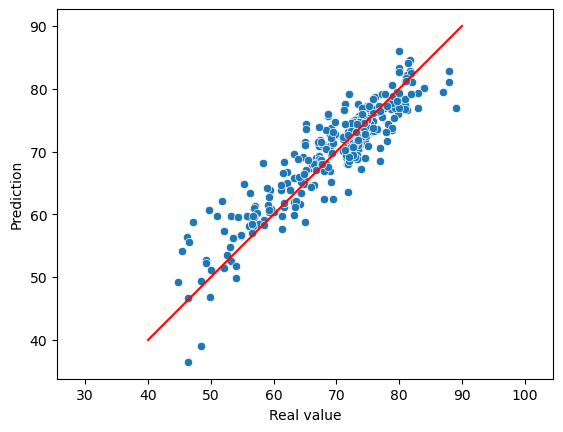

In [33]:
plt.figure()
sns.scatterplot(x = df_test[target], y = pred)
plt.plot([40, 90], [40, 90], color = "red")
plt.axis('equal')
plt.xlabel("Real value")
plt.ylabel("Prediction")
plt.show()